In [532]:
%reload_ext autoreload
%autoreload 2

from fastai import *
from fastai.tabular import *
from IPython.display import FileLink, FileLinks
torch.cuda.is_available()

True

In [772]:
path = Path('./data')
LABELS = 'labels.csv'
TRAIN = 'train.csv'
TEST = 'test.csv'
SAMPLE = 'gender_submission.csv'
batch_size = 16

In [773]:
df = pd.read_csv(path/TRAIN)
origTestDf = pd.read_csv(path/TEST)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [774]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [776]:
def prepareDf(df):
    df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    df['Age'] = df.Age.fillna(df.Age.mean())#.astype(np.int32)
    df['Fare'] = df.Fare.fillna(df.Fare.mean())#.astype(np.int32)
    df['Embarked'] = df.Embarked.fillna('S')
    return df

df = prepareDf(df)
testDf = prepareDf(origTestDf)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [777]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [778]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [779]:
procs = [FillMissing, Categorify, Normalize]

In [780]:
valid_idx = random.sample(list(df.index), int(0.2 * len(df)))
len(valid_idx)

178

In [781]:
dep_var = 'Survived'
cat_names = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [782]:
cards = df[cat_names].apply(pd.Series.nunique); cards

Pclass      3
Sex         2
SibSp       7
Parch       7
Embarked    3
dtype: int64

In [783]:
szs = pd.np.minimum(50, (cards+1)//2); szs

Pclass      2
Sex         1
SibSp       4
Parch       4
Embarked    2
dtype: int64

In [784]:
# emb_szs = dict((name, szs[name]) for name in cat_names); emb_szs
emb_szs = dict((name, 50) for name in cat_names); emb_szs

{'Pclass': 50, 'Sex': 50, 'SibSp': 50, 'Parch': 50, 'Embarked': 50}

In [785]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, test_df=testDf)

In [801]:
print(data.train_ds.cat_names)
print(data.train_ds.cont_names)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
['Age', 'Fare']


In [787]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy, emb_szs=emb_szs, ps=[0.5, 0.8], emb_drop=0.5, use_bn=True)
# learn.opt_func = partial(optim.Adam, betas=(0.7, 0.9))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


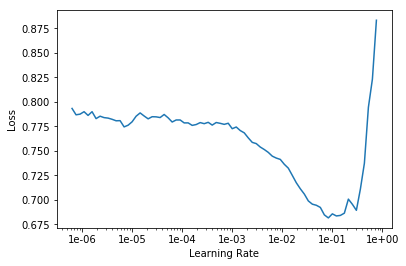

In [788]:
learn.lr_find()
learn.recorder.plot()

In [789]:
lr = 1e-2

In [790]:
learn.fit_one_cycle(20, lr)

epoch,train_loss,valid_loss,accuracy
1,0.768398,0.694805,0.353933
2,0.733846,0.660448,0.696629
3,0.664911,0.593225,0.719101
4,0.608191,0.497932,0.775281
5,0.566960,0.465587,0.775281
6,0.531722,0.489639,0.786517
7,0.519566,0.451758,0.820225
8,0.508559,0.468749,0.814607
9,0.500779,0.480354,0.797753
10,0.494683,0.452404,0.820225


In [792]:
learn.fit_one_cycle(50, lr)

epoch,train_loss,valid_loss,accuracy
1,0.417078,0.448625,0.825843
2,0.410848,0.446551,0.825843
3,0.409128,0.447099,0.837079
4,0.404495,0.447814,0.837079
5,0.399401,0.449006,0.825843
6,0.404454,0.447334,0.831461
7,0.402408,0.446368,0.837079
8,0.399993,0.449745,0.837079
9,0.407143,0.452468,0.820225
10,0.407733,0.456837,0.831461


In [793]:
int(learn.predict(testDf.iloc[0])[0])

0

In [794]:
len(testDf)

418

In [795]:
preds, targets = learn.get_preds(DatasetType.Test); preds[:5]

tensor([[0.8951, 0.1049],
        [0.6102, 0.3898],
        [0.9554, 0.0446],
        [0.8819, 0.1181],
        [0.6717, 0.3283]])

In [796]:
len(preds)

418

In [797]:
res = np.argmax(preds, axis=1); res[:10]

tensor([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [798]:
gender = pd.read_csv(path/SAMPLE);
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [799]:
out = origTestDf.assign(Survived=res)[['PassengerId', 'Survived']]; out.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [800]:
subPath = path/'sub6.csv'
out.to_csv(subPath, index=False)
FileLink(subPath)

/home/jupyter/alonso/titanic/data/sub6.csv